In [26]:


import pandas as pd
from sklearn import tree
import numpy as np



In [27]:
df=pd.read_csv('zoo.csv')

In [28]:
df.head()


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [56]:
X = df.iloc[:, 1:17]
X.shape

(101, 16)

In [57]:


y = df.iloc[:, 17]
y.shape



(101,)

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7, test_size=.3)

In [67]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier(criterion = "entropy")
clf = DTmodel.fit(X_train, y_train)


In [68]:
pred = clf.predict(X_test)
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9354838709677419


In [69]:


from sklearn import metrics 
print(metrics.confusion_matrix(y_test, pred))



[[12  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  1  1  0  0  0]
 [ 0  0  0  4  0  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  2  1]
 [ 0  0  0  0  0  0  1]]


In [70]:


import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning) 



In [71]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         7
           3       1.00      0.50      0.67         2
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         2
           6       1.00      0.67      0.80         3
           7       0.50      1.00      0.67         1

    accuracy                           0.94        31
   macro avg       0.90      0.88      0.86        31
weighted avg       0.96      0.94      0.93        31



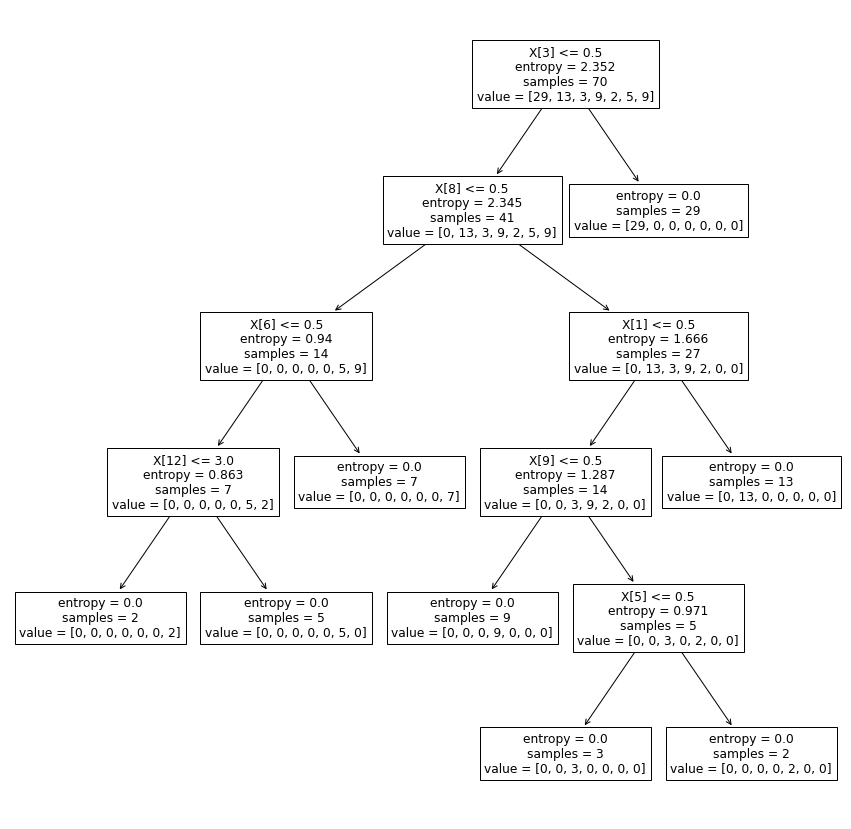

In [72]:
plt.figure(figsize = (15, 15))
tree.plot_tree(DTmodel)
plt.show()
